# Cybersecurity Salaries Analysis

In [317]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ipywidgets as widgets
import plotly.express as px
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


## Reading and processing dataset 

## Project Summary
This project would be focused on cybersecurity salary data. The cybersecurity salary dataset provides valuable insights into the compensation landscape within the cybersecurity industry. It captures various factors such as work experience, employment type, job titles, salary in USD, employee residence, remote work ratio, company location, and company size. Analyzing this data can help answer several business questions related to cybersecurity salaries, such as understanding the salary distribution across different experience levels, identifying the most lucrative job titles, comparing compensation between different employment types, and examining the impact of company size and location on cybersecurity salaries.

## Data Dictionary
This data dictionary provides a description of each column in the "saleries" table, including the meaning and purpose of the data captured in each column.
| Column Name         | Description                                                                                      |
|----------------------|------------------------------------------------------------------------------------------------|
| work_year           | .                                       |
| experience_level    | The experience level or category of the cybersecurity professional, such as entry-level, mid-level, or senior-level. |
| employment_type     | The type of employment, such as full-time, part-time, contract, or freelance.                   |
| job_title           | The job title or position of the cybersecurity professional.                                   |
| salary           | The salary in the original currency.                                   |
| salary_currency     | The currency in which the salary is denominated.                                               |
| salary_in_usd       | The salary amount converted to United States Dollars (USD) for standardization and comparison purposes. |
| employee_residence  | The country or region where the employee resides.                                              |
| remote_ratio        | The proportion of remote work allowed in the cybersecurity position, represented as a decimal (e.g., 0.5 for 50%). |
| company_location    | The location or country where the employing company is located.                                |
| company_size        | The size or scale of the employing company, typically categorized as small, medium, or large.   |


# Step 0: Goal definition

### Problem Statement
The objective of this project is to explore and analyze the dataset on global salaries in the cybersecurity sector. We aim to identify the key factors that influence salaries and develop advanced models to predict the salary range of professionals. Additionally, we will employ clustering techniques to discover hidden patterns and use Explainable AI (XAI) methods to interpret the models' predictions.

### Project Goals
1. **Classification Task**:
    - Build Machine Learning models to predict salary ranges (low, medium, high) based on features like role, experience, location, and other relevant characteristics.
    - Evaluate model performance using appropriate metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
2. **Clustering Analysis**:
    - Apply clustering algorithms (e.g., K-Means, DBSCAN) to identify hidden patterns or groups among professionals based on their features.
    - Visualize clusters using PCA or t-SNE to explore their characteristics.
3. **Address Class Imbalance**:
    - Use techniques like SMOTE (Synthetic Minority Oversampling) or Random Undersampling to manage class imbalance, ensuring fair and robust model performance.
4. **Explainable AI (XAI)**:
    - Integrate SHAP (SHapley Additive Explanations) and LIME (Local Interpretable Model-Agnostic Explanations) to interpret the models.
    - Explain feature importance and their impact on salary predictions.
5. **Model comparison**:
    - Compare the performance of various Machine Learning algorithms:
        Logistic Regression
        Random Forest
        CatBoost
    - Analyze the effect of sampling methods on performance metrics.


### Final Deliverables
- A well-documented analysis of salary prediction using classification models.
- Insights derived from clustering analysis to identify trends and patterns in the dataset.
- Model evaluation using multiple metrics and cross-validation techniques.
- Explainable AI results to interpret model behavior and explain feature contributions.
- Visualizations and a comprehensive discussion of results, challenges, and future improvements.


# Step 1: data acquisition

In this step, we will load the dataset and verify its structure to ensure it has been correctly imported.



In [318]:
# Step 1: Data Acquisition

# Loading the dataset
file_path = "dataset/salaries.csv"  
df = pd.read_csv(file_path)


# Step 2: data exploration

Dataset Overview:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,211000,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,142000,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,64417,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,52584,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,188400,USD,188400,US,0,US,M



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22609 entries, 0 to 22608
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           22609 non-null  int64 
 1   experience_level    22609 non-null  object
 2   employment_type     22609 non-null  object
 3   job_title           22609 non-null  object
 4   salary              22609 non-null  int64 
 5   salary_currency     22609 non-null  object
 6   salary_in_usd       22609 non-null  int64 
 7   employee_residence  22609 non-null  object
 8   remote_ratio        22609 non-null  int64 
 9   company_location    22609 non-null  object
 10  company_size        22609 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.9+ MB


None

(22609, 11)

Descriptive Statistics for Numerical Features:


,work_year,salary,salary_in_usd,remote_ratio
count,22609.000000,2.260900e+04,22609.00000,22609.000000
mean,2023.656376,2.009111e+05,147521.95002,23.543722
std,0.735059,5.198490e+06,63453.23768,41.969535
min,2020.000000,1.506100e+04,15061.00000,0.000000
25%,2024.000000,1.000000e+05,100000.00000,0.000000
50%,2024.000000,1.380000e+05,138000.00000,0.000000
75%,2024.000000,1.850000e+05,184000.00000,0.000000
max,2024.000000,6.000000e+08,720000.00000,100.000000



Visualizing Numerical Features:


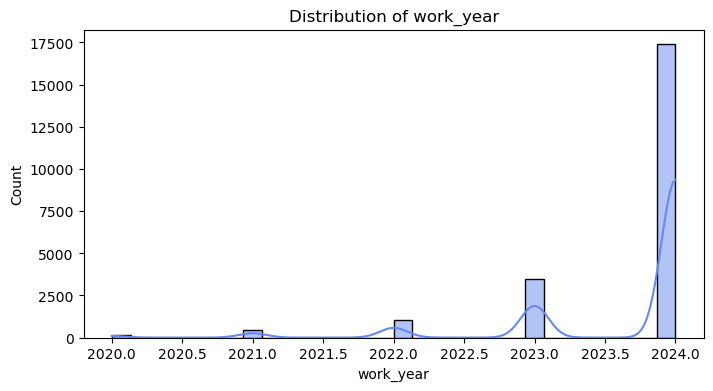

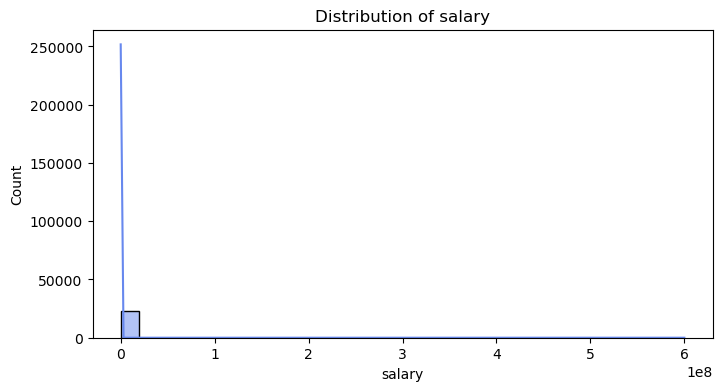

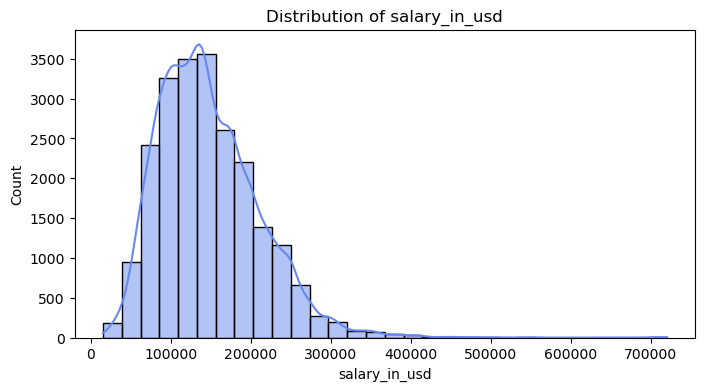

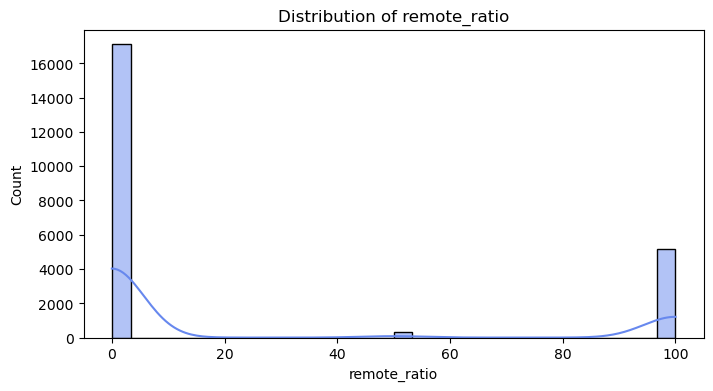

In [319]:
# Step 2: Data Exploration - Part 1


# Loading the dataset
# 1. Overview of the dataset
print("Dataset Overview:")
display(df.head())
print("\nDataset Info:")
display(df.info())
print(df.shape)

# 2. Descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
display(df.describe())

# Visualizing numerical features
print("\nVisualizing Numerical Features:")

# Identifying numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms for numerical features
for column in numerical_columns:
    if column == 'Salary':
        continue
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()




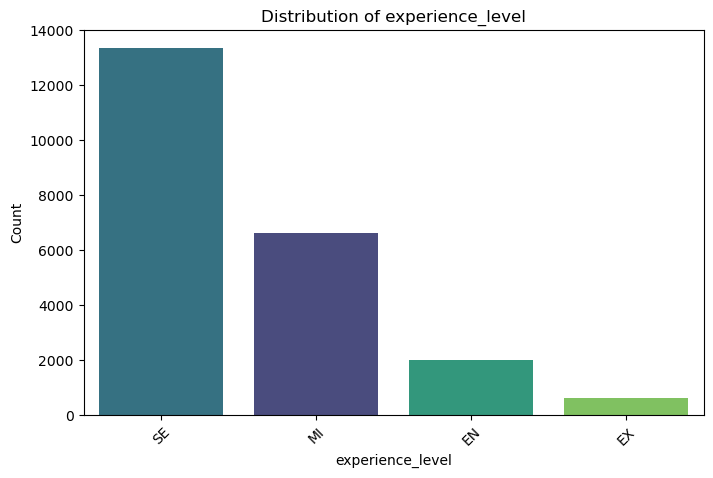

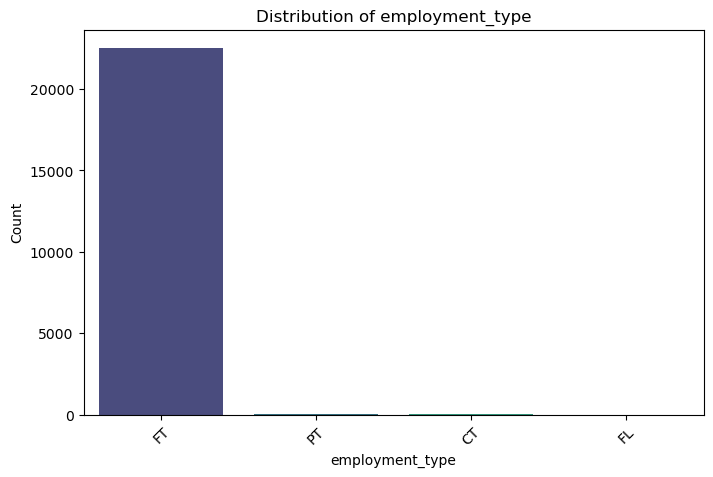

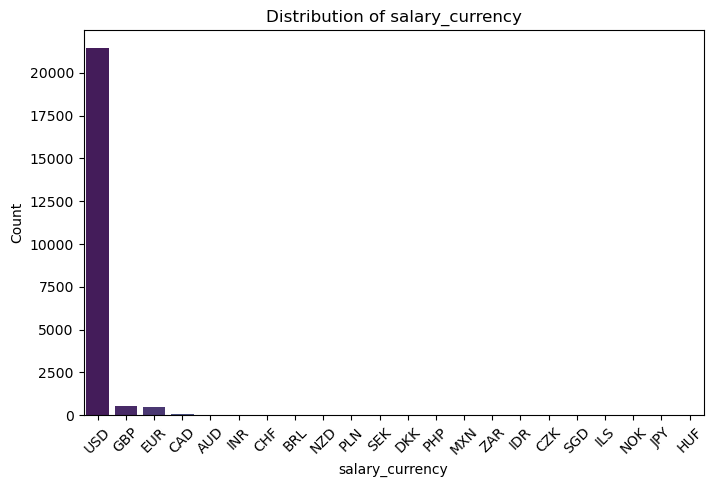

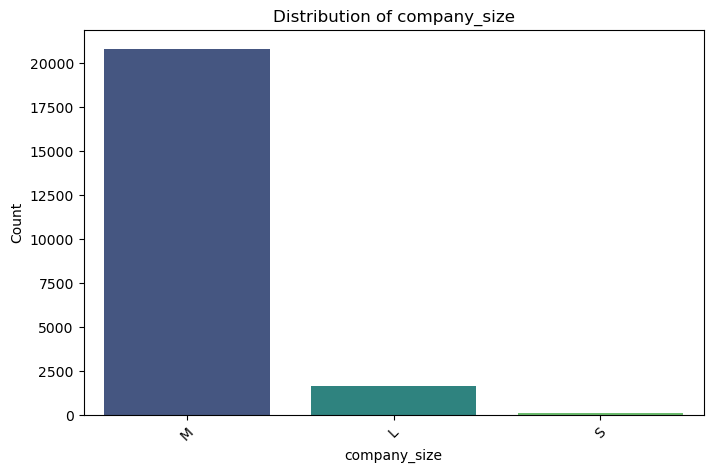

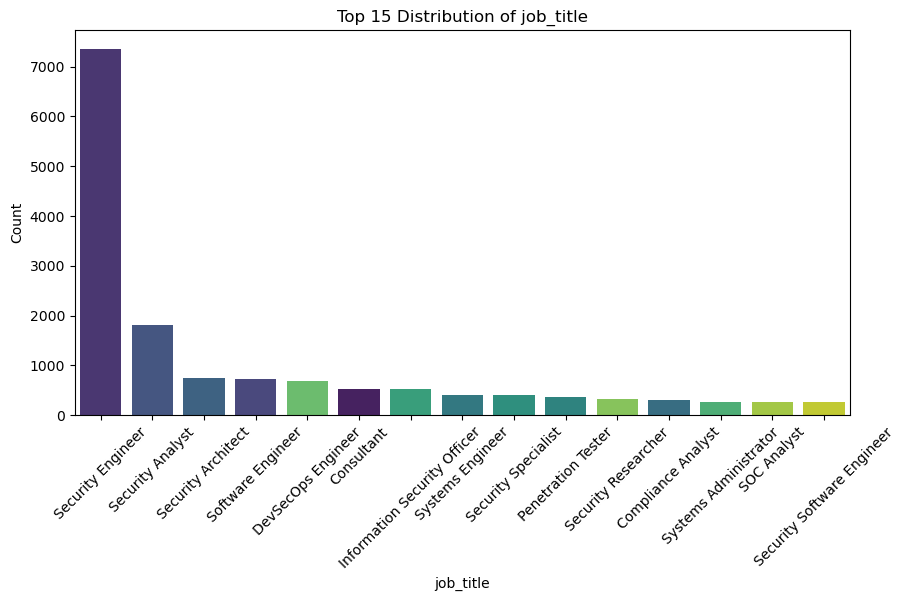

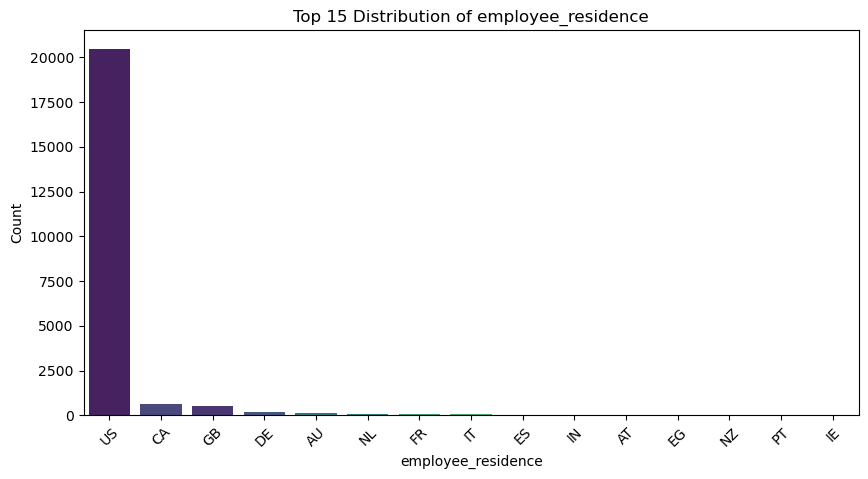

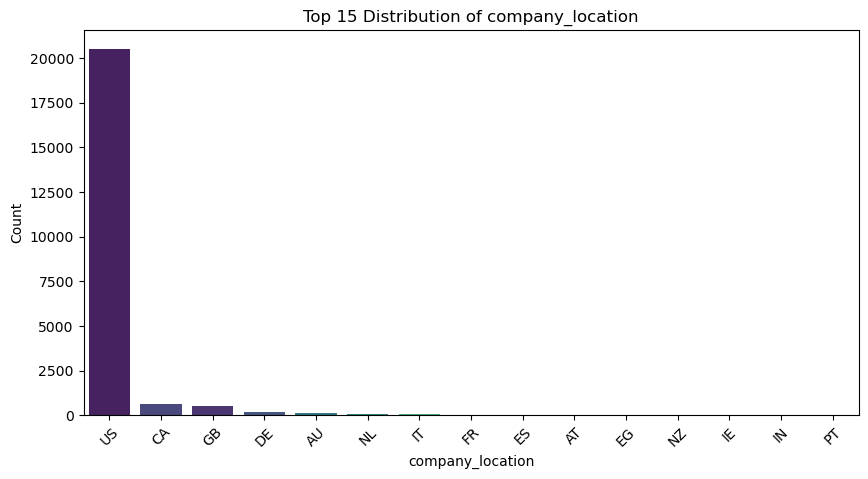


Analyzing Relationship Between Categorical Features and Salary_in_usd:


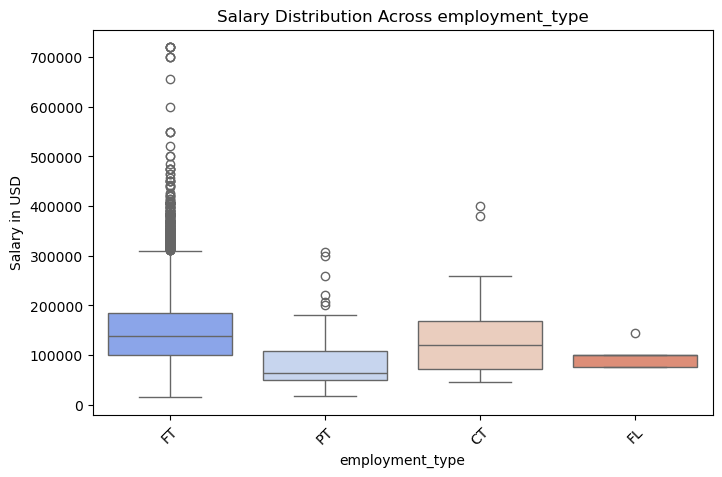

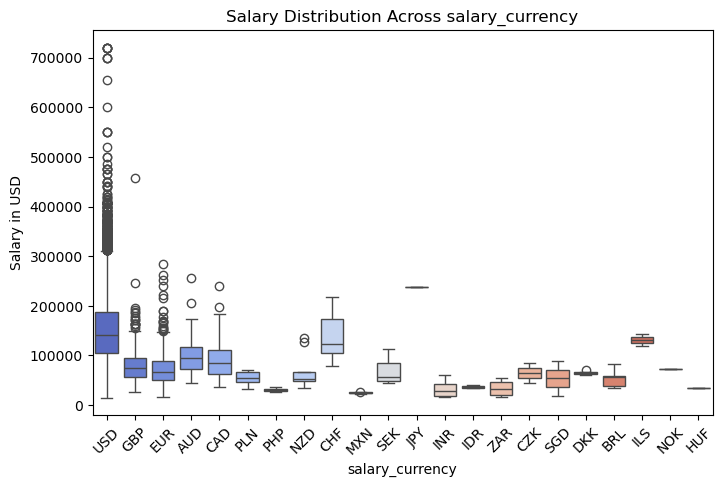

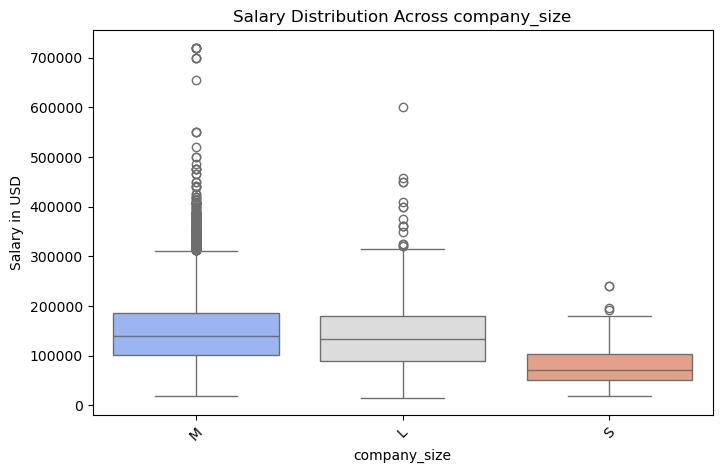

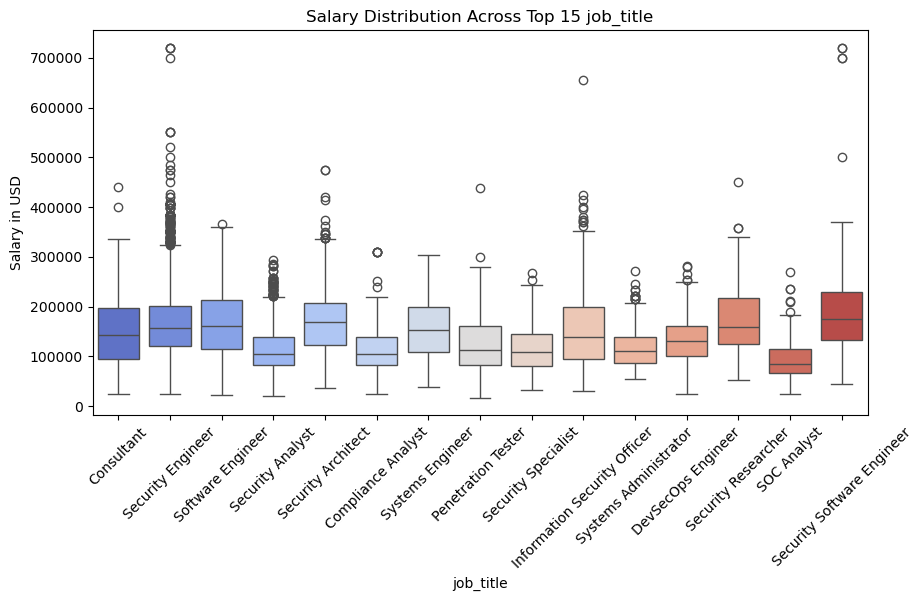

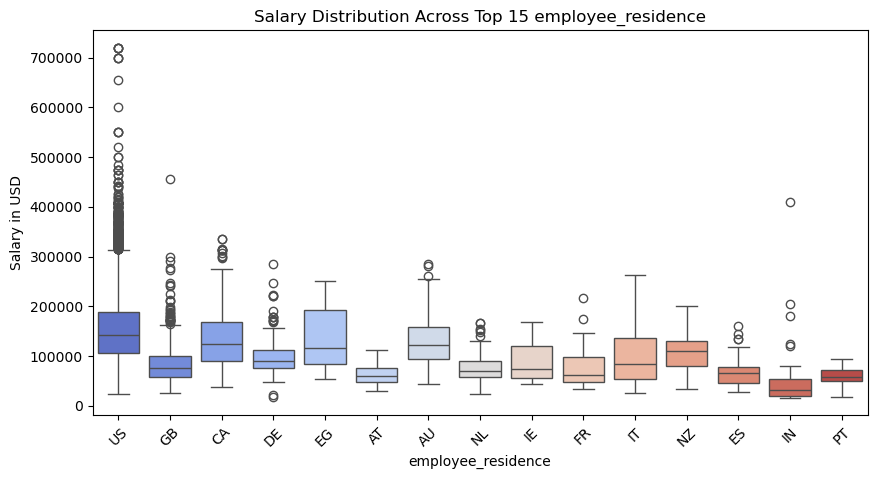

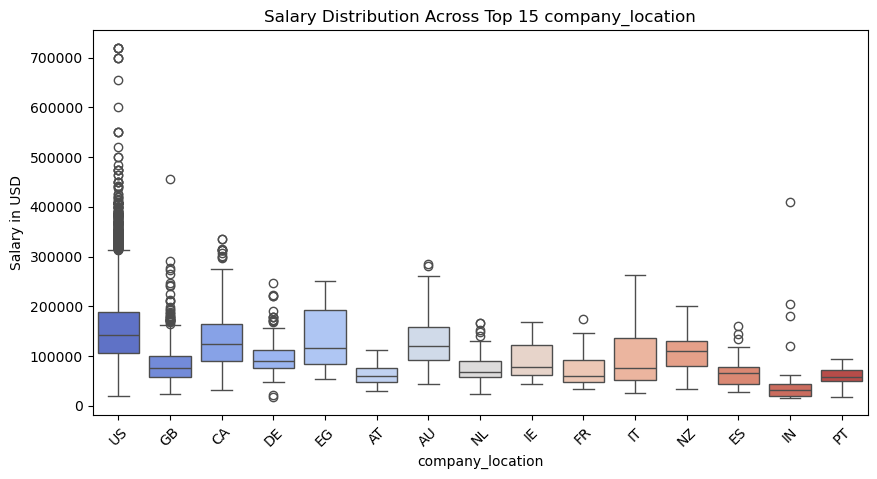

In [320]:
# Step 2: Data Exploration - Part 2 (Customized for Each Categorical Feature)

# Features to analyze
nominal_columns = ['experience_level', 'employment_type', 'job_title', 
                   'salary_currency', 'employee_residence', 'company_location', 'company_size']

# Separate features without problems and with problems of many categories
features_no_problem = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
features_problematic = ['job_title', 'employee_residence', 'company_location']

# 1. Distribution of Categorical Features

# Features without problems
for column in features_no_problem:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df, hue=column, palette='viridis', 
                  order=df[column].value_counts().index, legend=False)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Features with many categories: showing top 15
for column in features_problematic:
    top_15 = df[column].value_counts().head(15).index
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df[df[column].isin(top_15)], hue=column, palette='viridis', 
                  order=top_15, legend=False)
    plt.title(f"Top 15 Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# 2. Relationship Between Categorical Features and Target Variable (salary_in_usd)
print("\nAnalyzing Relationship Between Categorical Features and Salary_in_usd:")

# Features without problems
for column in features_no_problem:
    if column == 'experience_level':
        continue
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=column, y='salary_in_usd', hue=column, data=df, palette='coolwarm', legend=False)
    plt.title(f"Salary Distribution Across {column}")
    plt.xlabel(column)
    plt.ylabel("Salary in USD")
    plt.xticks(rotation=45)
    plt.show()

# Features with many categories: showing top 15
for column in features_problematic:
    top_15 = df[column].value_counts().head(15).index
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=column, y='salary_in_usd', hue=column, data=df[df[column].isin(top_15)], 
                palette='coolwarm', legend=False)
    plt.title(f"Salary Distribution Across Top 15 {column}")
    plt.xlabel(column)
    plt.ylabel("Salary in USD")
    plt.xticks(rotation=45)
    plt.show()



1. Correlation Matrix for Numerical Features:


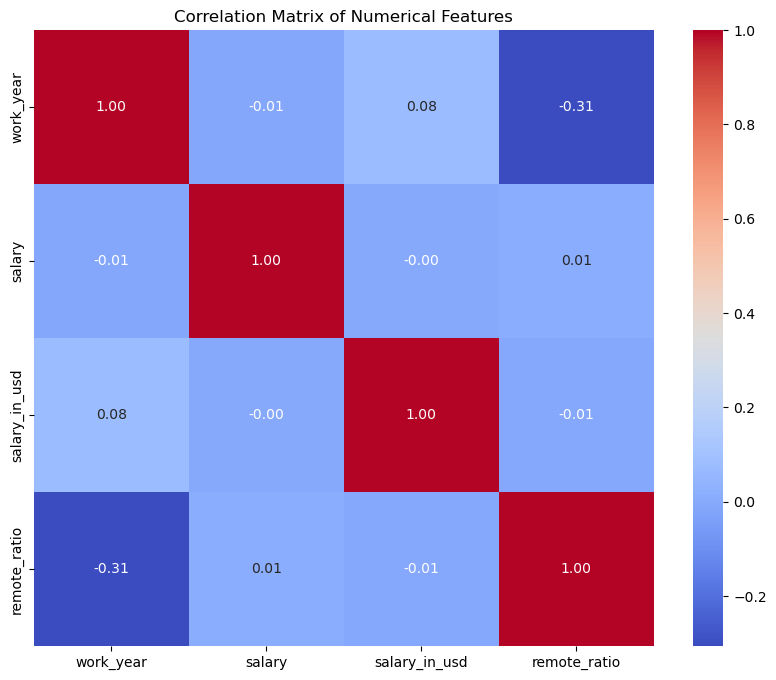


2. Outlier Detection using Boxplots:


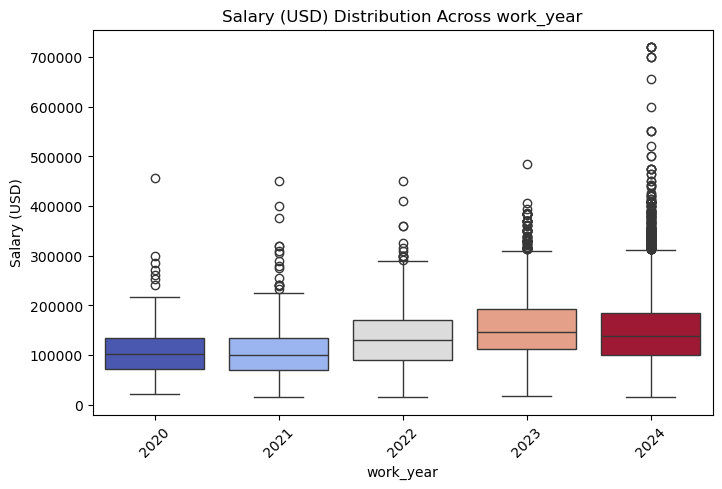

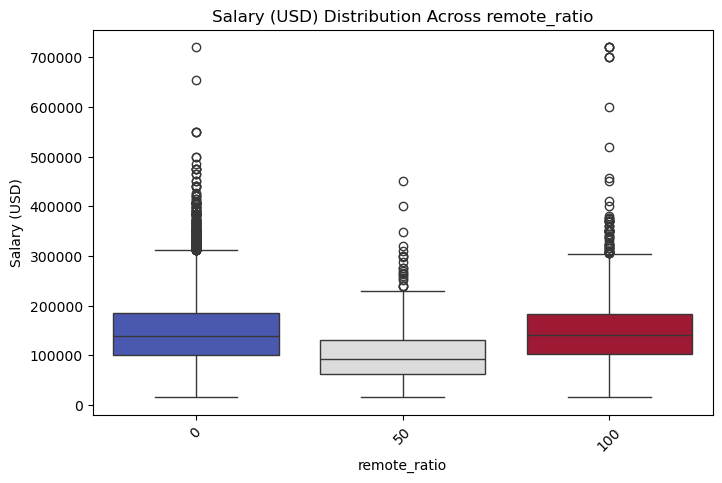


3. Scatter Plots for Numerical Features vs Salary (USD):


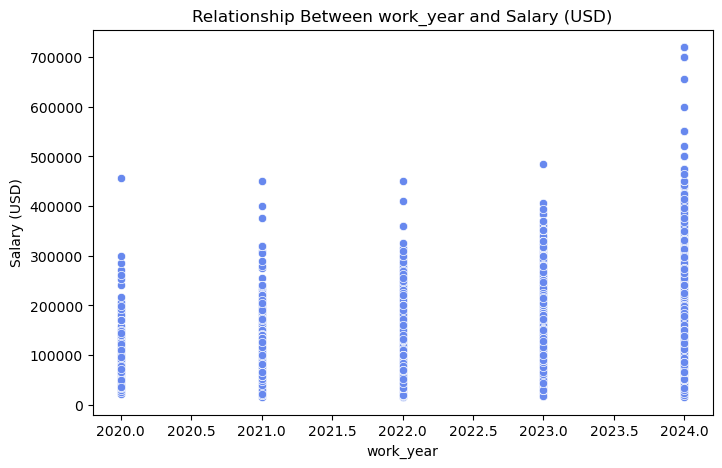

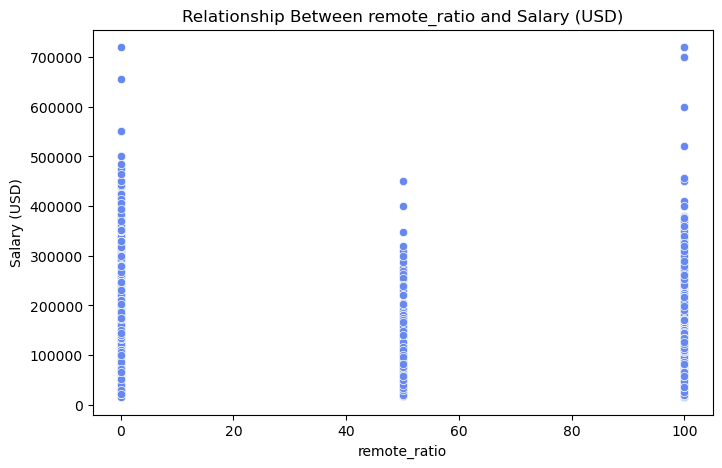

In [321]:
# Step 2: Data Exploration - Part 3

# 1. Correlation Matrix for Numerical Features
print("\n1. Correlation Matrix for Numerical Features:")

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# 2. Outlier Detection using Boxplots (Numerical Features vs salary_in_usd)
print("\n2. Outlier Detection using Boxplots:")

for column in numerical_columns:
    if column == 'salary':
        continue
    if column == 'salary_in_usd':
        continue    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=column, y='salary_in_usd', data=df, hue=column, palette='coolwarm', legend=False)
    plt.title(f"Salary (USD) Distribution Across {column}")
    plt.xlabel(column)
    plt.ylabel("Salary (USD)")
    plt.xticks(rotation=45)
    plt.show()

# 3. Relationship Between Numerical Features and Target (salary_in_usd)
print("\n3. Scatter Plots for Numerical Features vs Salary (USD):")

# Scatter plots for salary_in_usd against other numerical features
if 'salary_in_usd' in df.columns:
    for column in numerical_columns:
        if column == 'salary':
            continue
        if column == 'salary_in_usd':
            continue 
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=column, y='salary_in_usd', data=df)
        plt.title(f"Relationship Between {column} and Salary (USD)")
        plt.xlabel(column)
        plt.ylabel("Salary (USD)")
        plt.show()
else:
    print("\nWarning: 'salary_in_usd' not found. Ensure dataset contains salary data.")


## Data Visualization
After a broad exploration of all the features, this step will focus only the most relevant statistics and insights to provide a clear and concise undestanding of the dataset.

In [322]:
# Create a dictionary to perform Country Mapping
country_mapping = {
    'US': 'United States',
    'BR': 'Brazil',
    'BW': 'Botswana',
    'GB': 'United Kingdom',
    'TW': 'Taiwan',
    'NL': 'Netherlands',
    'IN': 'India',
    'DE': 'Germany',
    'AE': 'United Arab Emirates',
    'CA': 'Canada',
    'CH': 'Switzerland',
    'DK': 'Denmark',
    'CL': 'Chile',
    'ES': 'Spain',
    'SG': 'Singapore',
    'AU': 'Australia',
    'FR': 'France',
    'IT': 'Italy',
    'PK': 'Pakistan',
    'GR': 'Greece',
    'GH': 'Ghana',
    'AZ': 'Azerbaijan',
    'RO': 'Romania',
    'AR': 'Argentina',
    'DZ': 'Algeria',
    'AF': 'Afghanistan',
    'SI': 'Slovenia',
    'HR': 'Croatia',
    'SE': 'Sweden',
    'HU': 'Hungary',
    'ET': 'Ethiopia',
    'MX': 'Mexico',
    'IL': 'Israel',
    'IE': 'Ireland',
    'PL': 'Poland',
    'CR': 'Costa Rica',
    'JP': 'Japan',
    'PT': 'Portugal',
    'NG': 'Nigeria',
    'NO': 'Norway',
    'CZ': 'Czech Republic',
    'ID': 'Indonesia',
    'EE': 'Estonia',
    'KG': 'Kyrgyzstan',
    'KE': 'Kenya',
    'BG': 'Bulgaria',
    'IR': 'Iran',
    'NZ': 'New Zealand',
    'BE': 'Belgium',
    'ZA': 'South Africa',
    'AT': 'Austria',
    'LU': 'Luxembourg',
    'EG': 'Egypt',
    'VN': 'Vietnam',
    'SA': 'Saudi Arabia',
    'LT': 'Lithuania',
    'RU': 'Russia',
    'TR': 'Turkey'
}

df['employee_residence'] = df['employee_residence'].replace(country_mapping)

### What is the forms of work?


In [323]:
df_sub = df[['employment_type', 'job_title', 'remote_ratio', 'salary_in_usd']].copy()
df_sub.head(10)

,employment_type,job_title,remote_ratio,salary_in_usd
0,FT,Security Consultant,0,211000
1,FT,Security Consultant,0,142000
2,FT,Security Consultant,0,80521
3,FT,Security Consultant,0,65730
4,FT,Consultant,0,188400
5,FT,Consultant,0,125600
6,FT,Manager,0,246400
7,FT,Manager,0,117300
8,FT,Security Engineer,0,200200
9,FT,Security Engineer,0,190000


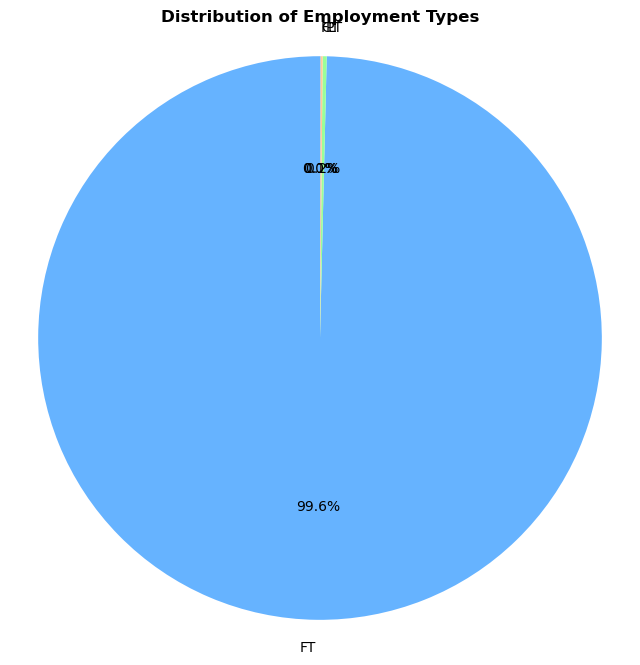

In [324]:
employment_type_counts = df_sub['employment_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(employment_type_counts, labels=employment_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Employment Types', fontweight='bold')

plt.axis('equal')

plt.show()


* **FT** (full-time): Full-time is the most common employment type, with 3068 cases in your dataset.

* **PT** (part-time): Part-time employment is represented in 15 cases. This may indicate that part-time employment is less common than full-time employment.

* **CT** (contract work): Contract work is presented in 12 cases. This may indicate that contract work also has its place in the employment structure.

* **FL** (freelance): Freelance work is presented in 4 cases. This may indicate that freelance work is less common in this dataset, but still represented.

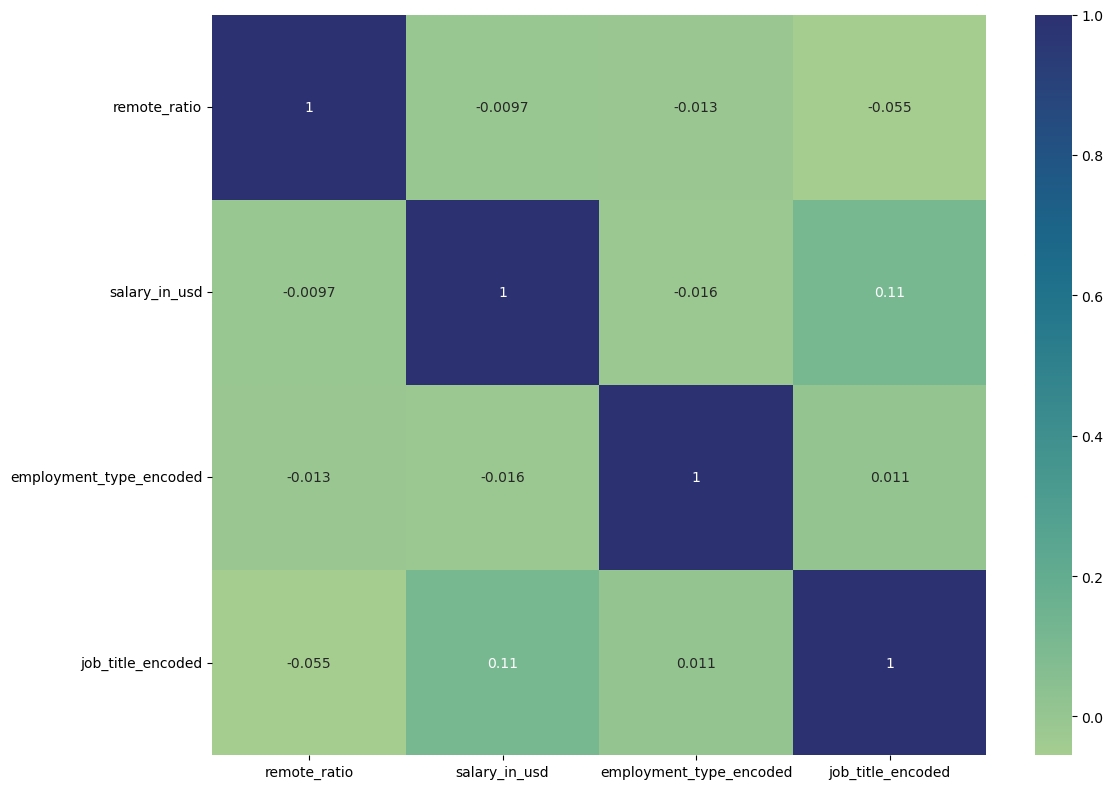

In [325]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_sub['employment_type_encoded'] = label_encoder.fit_transform(df_sub['employment_type'])
df_sub['job_title_encoded'] = label_encoder.fit_transform(df_sub['job_title'])

plt.figure(figsize = (12,8))
sns.heatmap(df_sub.corr(numeric_only = True), annot = True, cmap = 'crest')

plt.tight_layout()
plt.show()

According to the correlation matrix, you can tell that the relationship between remote work, salary, type of employment, and coded position is rather weak in your data. This may indicate that these characteristics may be independent of each other or have other non-linear relationships.

### What is the average salary for different cybersecurity roles?
Analyzing salary data to determine the average salaries for different cybersecurity roles also known as compensation benmarking. This information serves as a valuable tool for businesses to benchmark their own compensation packages against industry standards to attracting and retaining top talent.

In [326]:
import numpy as np
import plotly.express as px

# Top 10 average salary by job title
# Calculate the rounded average salary by job title and select the top 10 highest paid roles in ascending order
avg_salary_by_job_title = df.groupby('job_title')['salary_in_usd'].mean().nlargest(10).sort_values(ascending=True)
# Round up the average salary amounts
avg_salary_by_job_title_rounded = np.ceil(avg_salary_by_job_title)
# Create a horizontal bar chart for the top 10 highest paid roles in ascending order
fig = px.bar(
    x=avg_salary_by_job_title_rounded,
    y=avg_salary_by_job_title_rounded.index,
    color=avg_salary_by_job_title_rounded,
    labels={'x': 'Average Salary (USD)', 'y': 'Job Title'},
    text=avg_salary_by_job_title_rounded,
    orientation='h',
    template='seaborn',
    title='<b>Top 10 Highest Paid Roles in Cyber Security (Ascending Order)</b>'
)
fig.show()

# Bottom 10 average salary by job title
# Calculate the rounded average salary by job title and select the bottom 10 least paid roles in descending order
avg_salary_by_job_title = df.groupby('job_title')['salary_in_usd'].mean().nsmallest(10).sort_values(ascending=True)
# Round up the average salary amounts
avg_salary_by_job_title_rounded = np.ceil(avg_salary_by_job_title)
# Create a horizontal bar chart for the bottom 10 least paid roles in descending order
fig = px.bar(
    x=avg_salary_by_job_title_rounded,
    y=avg_salary_by_job_title_rounded.index,
    color=avg_salary_by_job_title_rounded,
    labels={'x': 'Average Salary (USD)', 'y': 'Job Title'},
    text=avg_salary_by_job_title_rounded,
    orientation='h',
    template='seaborn',
    title='<b>Bottom 10 Least Paid Roles in Cyber Security</b>'
)
fig.show()


### Salary Distribution by Experience Level
Examining salary data based on experience levels and seniority within the cybersecurity field can help businesses understand the relationship between years of experience and compensation. This analysis can inform decisions related to career progression, promotions, and salary structures within an organization.



In [327]:
salary_distribution_by_experience = px.box(df, x='experience_level', y='salary_in_usd', color='experience_level',
             labels={'experience_level': 'Experience Level', 'salary_in_usd': 'Salary (USD)'},
             title='Salary Distribution by Experience Level')

salary_distribution_by_experience.show()

### Regional Salary Disparity
By examining salary data across different geographical regions, you can identify any regional disparities in cybersecurity salaries. This analysis can help businesses understand the impact of location on compensation and make informed decisions when expanding their operations or considering remote work policies

In [328]:
# import plotly.express as px

# # Calculate the average salaries by employee residence
# avg_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()

# # Create a choropleth map
# fig_choropleth = px.choropleth(avg_salary_by_residence, locations='employee_residence', locationmode='country names',
#                                color='salary_in_usd', title='Regional Salary Disparity',
#                                color_continuous_scale='RdYlBu', labels={'salary_in_usd': 'Average Salary (USD)'})

# # Update the layout of the choropleth map
# fig_choropleth.update_layout(geo=dict(showframe=False, showcoastlines=False))

# # Show the choropleth map
# fig_choropleth.show()

### Salary Trends Over Time
By analyzing salary data over time, you can identify trends and patterns in compensation within the cybersecurity field. This analysis can help businesses anticipate changes in salary expectations and adjust their recruitment and retention strategies accordingly.

In [329]:
# Salary Trends Over Time

# year_based_salary = df['salary_in_usd'].groupby(df['work_year']).mean()

# salary_trend_graph = px.line(x=['2020', '2021', '2022', '2023', '2024'], y=year_based_salary.values, labels={'x': 'Work Year', 'y': 'Salary'},title='Salary Trends Over Time')

# salary_trend_graph.show()

### Remote Work and Salary
By performing analysis based on remote work and salary in relation to employees' location, companies can gain valuable insights to optimize remote work policies, ensure fair compensation, attract top talent, and make data-driven decisions related to resource allocation and cost management.

In [330]:
# Remote Work and Salary based on employees location
# remote_work_viz = px.choropleth(df, locations='employee_residence', locationmode='country names',
#                     color='remote_ratio', hover_data=['salary_in_usd'],
#                     labels={'remote_ratio': 'Remote Work Ratio', 'salary_in_usd': 'Salary (USD)'},
#                     title='Remote Work and Salary by Employee Residence')

# remote_work_viz.show()

### Overoll Correlation


In [331]:
df_enc = df.copy()

df_enc['job_title'] = label_encoder.fit_transform(df['job_title'])

df_enc['experience_level'] = label_encoder.fit_transform(df['experience_level'])

df_enc['employment_type'] = label_encoder.fit_transform(df['employment_type'])

df_enc['salary_currency'] = label_encoder.fit_transform(df['salary_currency'])
df_enc['employee_residence'] = label_encoder.fit_transform(df['employee_residence'])
df_enc['company_location'] = label_encoder.fit_transform(df['company_location'])

df_enc['company_size'] = label_encoder.fit_transform(df['company_size'])

In [332]:
correlation = df_enc.corr()

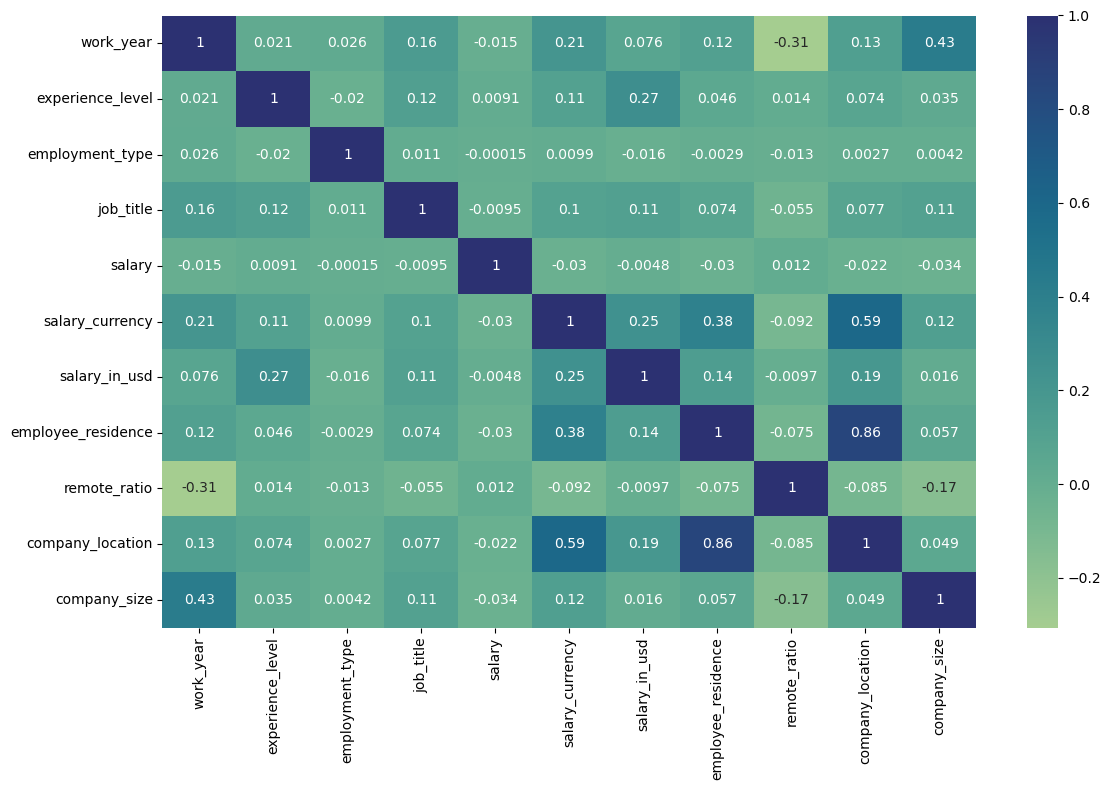

In [333]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True, cmap = 'crest')

plt.tight_layout()
plt.show()

In [334]:
correlation

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.020532,0.025604,0.155193,-0.014969,0.205865,0.076354,0.115858,-0.306095,0.125580,0.427158
experience_level,0.020532,1.000000,-0.020488,0.121330,0.009098,0.109473,0.269840,0.045944,0.014377,0.073634,0.035405
employment_type,0.025604,-0.020488,1.000000,0.010664,-0.000147,0.009939,-0.016312,-0.002867,-0.013145,0.002665,0.004177
job_title,0.155193,0.121330,0.010664,1.000000,-0.009467,0.099580,0.113254,0.074181,-0.055172,0.076692,0.108175
salary,-0.014969,0.009098,-0.000147,-0.009467,1.000000,-0.030171,-0.004827,-0.029596,0.011672,-0.022413,-0.033943
salary_currency,0.205865,0.109473,0.009939,0.099580,-0.030171,1.000000,0.248891,0.380454,-0.092182,0.592743,0.124220
salary_in_usd,0.076354,0.269840,-0.016312,0.113254,-0.004827,0.248891,1.000000,0.138585,-0.009723,0.193019,0.016255
employee_residence,0.115858,0.045944,-0.002867,0.074181,-0.029596,0.380454,0.138585,1.000000,-0.075435,0.856328,0.057354
remote_ratio,-0.306095,0.014377,-0.013145,-0.055172,0.011672,-0.092182,-0.009723,-0.075435,1.000000,-0.085341,-0.165817
company_location,0.125580,0.073634,0.002665,0.076692,-0.022413,0.592743,0.193019,0.856328,-0.085341,1.000000,0.048644


## **Correlation Analysis of Variables**  

### **Positive Correlations**  
Positive correlations indicate that as one variable increases, the other tends to increase as well. Below are some notable relationships:  

- **`work_year` and `company_size`** (0.427)  
  - There is a strong positive correlation between the year of work and company size. This suggests that in more recent years, larger companies tend to employ more workers.  
- **`salary_in_usd` and `experience_level`** (0.269)  
  - The experience level of employees is positively correlated with salary. This aligns with the expectation that higher experience levels lead to higher salaries.  
- **`salary_in_usd` and `salary_currency`** (0.249)  
  - The correlation shows that the currency of salary can significantly influence the amount. Stronger currencies may result in higher salaries when converted to USD.  
- **`company_location` and `employee_residence`** (0.856)  
  - There is a very high correlation between company location and employee residence. This suggests that employees are more likely to work in companies located near their residence.  

---

### **Negative Correlations**  
Negative correlations indicate that as one variable increases, the other tends to decrease.  

- **`work_year` and `remote_ratio`** (-0.306)  
  - In more recent years, there appears to be a slight decrease in the ratio of remote work. This might indicate a return to in-office activities.  
- **`remote_ratio` and `company_size`** (-0.166)  
  - The negative correlation between remote work and company size suggests that larger companies tend to have a lower remote work ratio compared to smaller companies.  
- **`salary_in_usd` and `salary`** (-0.048)  
  - A slight negative correlation between `salary_in_usd` and `salary` indicates that in some cases, higher local currency salaries may not correspond to equally high USD salaries, potentially due to currency fluctuations.  

---

### **General Interpretation**  
- **The highest positive correlations** (such as `company_location` and `employee_residence`) reflect predictable relationships, like the tendency of companies to hire locally.  
- **Negative correlations**, especially involving remote work, may reflect shifts in the labor market and company preferences regarding work arrangements.  

This analysis can help identify key trends and areas for strategic adjustments, such as promoting remote work policies or understanding the influence of company size on salaries.  


# Step 3: Data pre-processing

## Data cleaning 

In [335]:
# Part 1: Data Cleaning

# 1. Check for Duplicates
print("\nChecking for Duplicates...")
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Drop duplicates if any
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

# 2. Check for Missing Values
print("\nChecking for Missing Values...")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Imputation or Removal of Missing Values
# Strategy: Drop rows or Impute with mean/median
columns_with_null = missing_values[missing_values > 0].index
for column in columns_with_null:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
        print(f"Missing values in '{column}' filled with median.")
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)
        print(f"Missing values in '{column}' filled with mode.")

# Final Check for Missing Values
print("\nFinal Check for Missing Values:")
print(df.isnull().sum())



Checking for Duplicates...
Number of duplicate rows: 9333
Duplicate rows removed.

Checking for Missing Values...
Series([], dtype: int64)

Final Check for Missing Values:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [336]:
unique_employee_residence = df['employee_residence'].nunique()
print("Number of unique employee residence:", unique_employee_residence)

unique_job_titles = df['job_title'].nunique()
print("Number of unique job titles:", unique_job_titles)

#Check for negative salaries 
negative_salaries = df[df['salary_in_usd'] < 0]
print("Negative Salaries:")
print(negative_salaries)

#Check for data range Check for salaries outside a specific range
salary_range = (1000, 1000000)
out_of_range_salaries = df[(df['salary_in_usd'] < salary_range[0]) | (df['salary_in_usd'] > salary_range[1])]
print("Out of Range Salaries:")
print(out_of_range_salaries)

Number of unique employee residence: 79
Number of unique job titles: 254
Negative Salaries:
Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []
Out of Range Salaries:
Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


In [337]:
# Drop the 'salary' column because we will only use salary_in_usd for this analysis
df = df.drop('salary', axis=1)

# Print the updated DataFrame
df.head()


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,USD,211000,United States,0,US,M
1,2024,MI,FT,Security Consultant,USD,142000,United States,0,US,M
2,2024,MI,FT,Security Consultant,GBP,80521,United Kingdom,0,GB,M
3,2024,MI,FT,Security Consultant,GBP,65730,United Kingdom,0,GB,M
4,2024,MI,FT,Consultant,USD,188400,United States,0,US,M


## Encoding of the categorical features

In [338]:

# 1. Define the feature sets
low_cardinality_features = ['experience_level', 'employment_type', 'company_size', 'salary_currency']
high_cardinality_features = ['job_title', 'employee_residence', 'company_location']

# 2. Apply One-Hot Encoding for low cardinality features
print("\nApplying One-Hot Encoding for low cardinality features...")
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 3. Apply Ordinal Encoding for high cardinality features
print("\nApplying Ordinal Encoding for high cardinality features...")
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# 4. Column Transformer: Combine both encodings
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe, low_cardinality_features),
        ('oe', oe, high_cardinality_features)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Apply the transformation
print("\nEncoding the dataset...")
encoded_data = preprocessor.fit_transform(df)

# Convert to a DataFrame with updated column names
ohe_columns = preprocessor.named_transformers_['ohe'].get_feature_names_out(low_cardinality_features)
all_columns = list(ohe_columns) + high_cardinality_features + ['work_year', 'salary_in_usd', 'remote_ratio']

df_encoded = pd.DataFrame(encoded_data, columns=all_columns)

# Display the transformed DataFrame
print("\nTransformed Dataset:")
print(df_encoded.head())
print(df.head())  # Mostra il DataFrame originale




Applying One-Hot Encoding for low cardinality features...

Applying Ordinal Encoding for high cardinality features...

Encoding the dataset...

Transformed Dataset:
   experience_level_EN  experience_level_EX  experience_level_MI  \
0                  0.0                  0.0                  1.0   
1                  0.0                  0.0                  1.0   
2                  0.0                  0.0                  1.0   
3                  0.0                  0.0                  1.0   
4                  0.0                  0.0                  1.0   

   experience_level_SE  employment_type_CT  employment_type_FL  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
4                  0.0                 0.0                 0.0   

   employment_type_FT  emplo

### Outlier detection


Visualizing Outliers with Boxplots (Before Log Transformation):


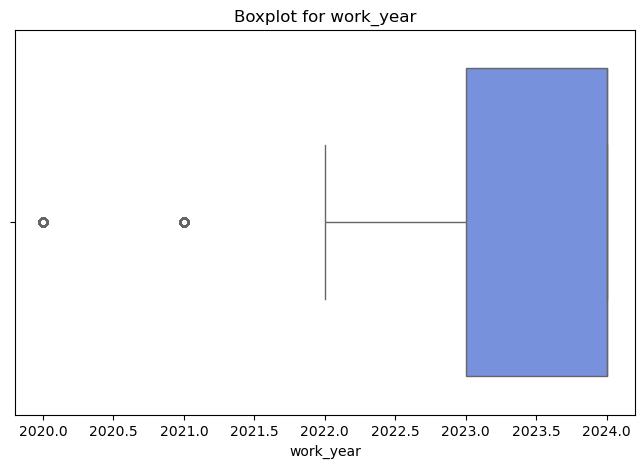

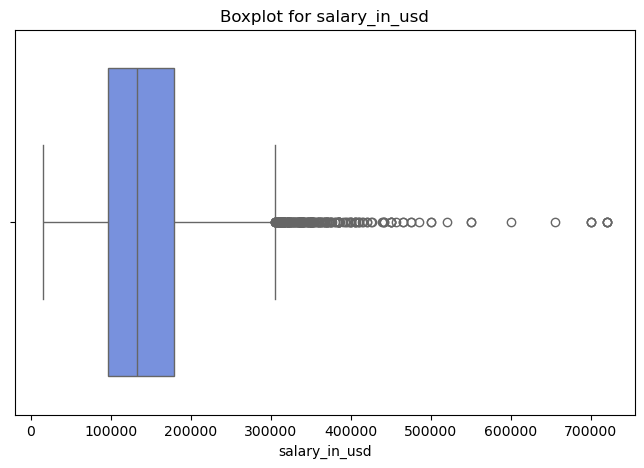

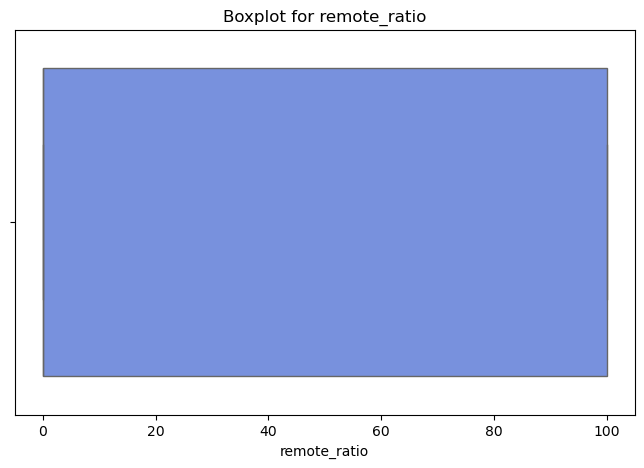


Identifying Outliers Using IQR Method:

Feature: work_year
 - Lower Bound: 2021.5
 - Upper Bound: 2025.5
 - Number of Outliers: 642

Feature: salary_in_usd
 - Lower Bound: -29646.5
 - Upper Bound: 304877.5
 - Number of Outliers: 227

Feature: remote_ratio
 - Lower Bound: -150.0
 - Upper Bound: 250.0
 - Number of Outliers: 0

Outlier Summary (Before Log Transformation):
work_year: 642 outliers
salary_in_usd: 227 outliers
remote_ratio: 0 outliers

Applying Log Transformation to 'salary_in_usd'...


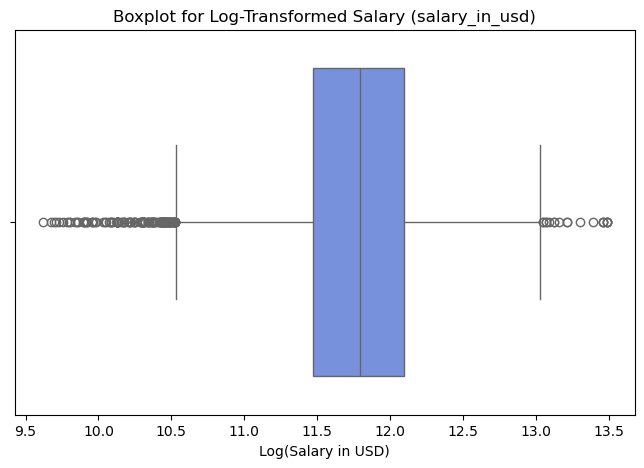

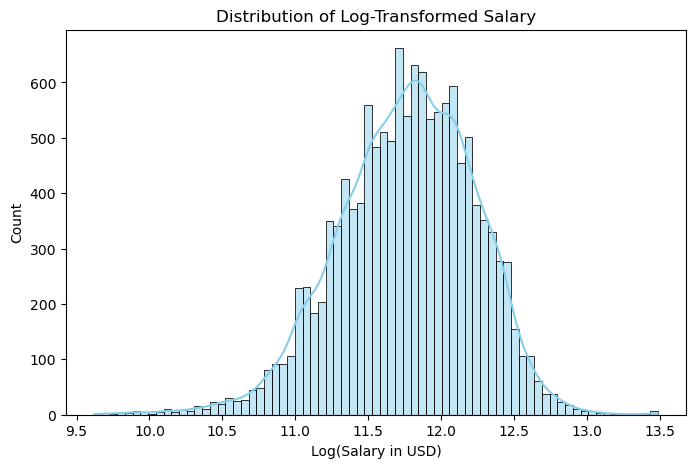


Log Transformation Applied Successfully!
   work_year experience_level employment_type            job_title  \
0       2024               MI              FT  Security Consultant   
1       2024               MI              FT  Security Consultant   
2       2024               MI              FT  Security Consultant   
3       2024               MI              FT  Security Consultant   
4       2024               MI              FT           Consultant   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         211000      United States             0   
1             USD         142000      United States             0   
2             GBP          80521     United Kingdom             0   
3             GBP          65730     United Kingdom             0   
4             USD         188400      United States             0   

  company_location company_size  
0               US            M  
1               US            M  
2               GB  

In [339]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Outlier Analysis

# 1. Visualize outliers with boxplots for all numerical features
print("\nVisualizing Outliers with Boxplots (Before Log Transformation):")

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
sns.set_palette("coolwarm")  # Set a global color palette (optional)

for column in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)
    plt.show()

# 2. Identify outliers using the IQR method
print("\nIdentifying Outliers Using IQR Method:")

outlier_info = {}

for column in numerical_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    num_outliers = outliers.shape[0]
    
    outlier_info[column] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': num_outliers
    }
    print(f"\nFeature: {column}")
    print(f" - Lower Bound: {lower_bound}")
    print(f" - Upper Bound: {upper_bound}")
    print(f" - Number of Outliers: {num_outliers}")

# 3. Display outlier summary
print("\nOutlier Summary (Before Log Transformation):")
for feature, info in outlier_info.items():
    print(f"{feature}: {info['Number of Outliers']} outliers")

# 4. Apply log transformation to 'salary_in_usd' to reduce outliers
print("\nApplying Log Transformation to 'salary_in_usd'...")



# Visualizzare la distribuzione di salary_in_usd (log) senza modificarlo
df_copy = df.copy()

df_copy['salary_in_usd'] = np.log1p(df_copy['salary_in_usd'])

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_copy['salary_in_usd'])
plt.title("Boxplot for Log-Transformed Salary (salary_in_usd)")
plt.xlabel("Log(Salary in USD)")
plt.show()


# Visualize the new distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_copy['salary_in_usd'], kde=True, color='skyblue')
plt.title("Distribution of Log-Transformed Salary")
plt.xlabel("Log(Salary in USD)")
plt.show()

# 5. Visualize salary_in_usd in original scale (inverse log)
#print("\nVisualizing Salary in Original Scale (Inverse Log):")

# plt.figure(figsize=(8, 5))
# sns.boxplot(x=np.expm1(df['salary_in_usd']))  # Apply inverse log transformation
# plt.title("Boxplot for Salary in USD (Original Scale)")
# plt.xlabel("Salary in USD")
# plt.show()

print("\nLog Transformation Applied Successfully!")

print(df.head())

### **Why Applying Log Transformation to Outliers is Useful**  

---

#### 1. **Outliers Represent Real-World Variability**  
- In fields like **cybersecurity**, large variations in salaries are realistic. For example:  
  - Senior professionals or specialized roles may have exceptionally high salaries.  
  - Freelancers or entry-level positions may show lower salaries.  
- **We do not remove outliers**, but instead reduce their impact by applying a log transformation, preserving **all variability** without distorting the data.  

---

#### 2. **Log Transformation Preserves Valuable Trends**  
- Outliers may reveal **valuable patterns** or anomalies in the data:  
  - Companies paying significantly higher salaries in certain locations.  
  - Rare but critical job titles with very high compensation.  
- By applying a log transformation:  
  - **Outliers are retained**, but their influence is compressed, reducing their negative impact on the model.  
  - Trends remain visible, but the model can handle them more effectively.  

---

#### 3. **Realistic Salary Predictions with Full Data**  
- Removing outliers can lead to **overly simplistic models** that are less applicable to real-world scenarios.  
- Log transformation allows the model to **understand the full range of salaries** without excluding extreme values.  
- **Predictions become more accurate** because the model learns from real data, including the most extreme cases.  

---

#### 4. **Domain Context Justifies Salary Variations**  
- Cybersecurity salaries naturally vary based on:  
  - **Geography**: Certain regions (e.g., US, Western Europe) have higher pay scales.  
  - **Experience**: Senior-level employees can earn salaries far beyond the median.  
  - **Role**: Advanced positions such as Security Architects and Penetration Testers receive higher compensation.  
- **Log transformation retains this data**, avoiding distortions in the analysis of such important variations.  

---

#### 5. **Log Transformation Makes Models More Robust**  
- Models like **linear regression** or neural networks are sensitive to outliers.  
- Log transformation reduces their influence by:  
  - Compressing extremely high salaries, making them less dominant in the predictions.  
  - **Robust models like Random Forest or XGBoost** can still benefit from the transformation, even though they are more resilient to outliers.  

---

### **Conclusion**  
Instead of removing outliers in the `salary_in_usd` column, we applied a **log transformation** to reduce their impact without losing valuable data.  
This approach preserves **real-world variability** and ensures the model captures the entire salary range effectively.  

If necessary, we can reverse the transformation after predictions to interpret the results in **USD** (`np.expm1()`).  


## Feature Selection and Scaling


1. Correlation Analysis for Numerical Features Only:


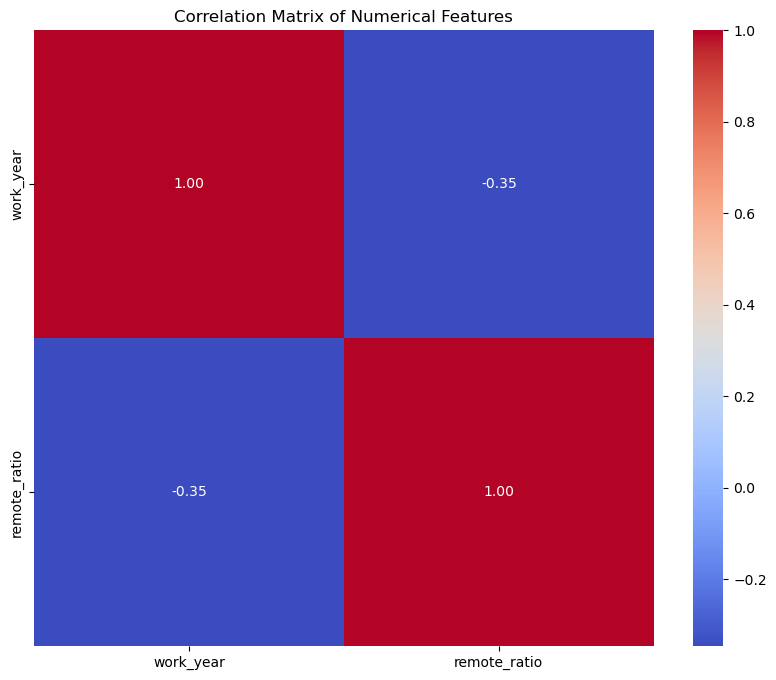


No highly correlated features found.

No features were dropped due to high correlation.


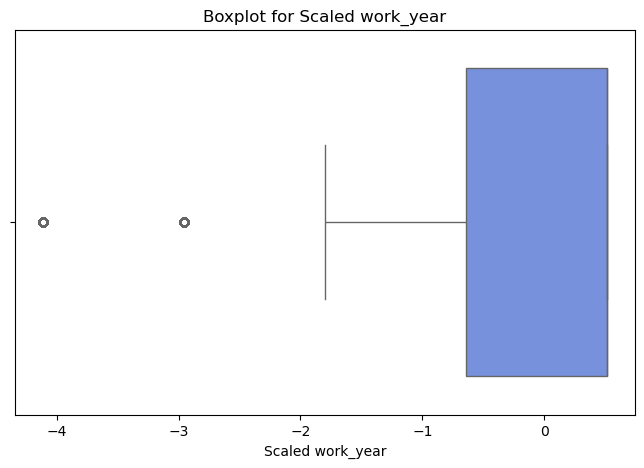

          work_year  salary_in_usd  remote_ratio
count  13276.000000   13276.000000  13276.000000
mean    2023.557096  142650.373682     28.547755
std        0.865132   65424.434329     44.438663
min     2020.000000   15061.000000      0.000000
25%     2023.000000   95800.000000      0.000000
50%     2024.000000  132145.000000      0.000000
75%     2024.000000  179431.000000    100.000000
max     2024.000000  720000.000000    100.000000
          work_year  salary_in_usd  remote_ratio
count  1.327600e+04   13276.000000  13276.000000
mean   5.583295e-14      11.764475     28.547755
std    1.000038e+00       0.467610     44.438663
min   -4.111776e+00       9.619930      0.000000
25%   -6.439669e-01      11.470028      0.000000
50%    5.119694e-01      11.791663      0.000000
75%    5.119694e-01      12.097552    100.000000
max    5.119694e-01      13.487008    100.000000


In [340]:
from sklearn.preprocessing import StandardScaler

# Step 4: Feature Selection and Scaling

# 1. Correlation Analysis for Numerical Features Only
print("\n1. Correlation Analysis for Numerical Features Only:")

# Select numerical columns (exclude the target variable 'salary_in_usd')
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('salary_in_usd')

# Calculate correlation matrix only for numerical features
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Identify highly correlated features
threshold = 0.85  # Set threshold for correlation
high_corr_pairs = []

for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if col != idx and abs(correlation_matrix.loc[idx, col]) > threshold:
            high_corr_pairs.append((col, idx))

# Print highly correlated feature pairs
if high_corr_pairs:
    print("\nHighly Correlated Feature Pairs (Correlation > 0.85):")
    for pair in high_corr_pairs:
        print(f" - {pair[0]} and {pair[1]}")
else:
    print("\nNo highly correlated features found.")

# Drop one feature of highly correlated pairs (if any)
features_to_drop = list(set([pair[1] for pair in high_corr_pairs]))
if features_to_drop:
    df = df.drop(features_to_drop, axis=1)
    print(f"\nDropped features due to high correlation: {features_to_drop}")
else:
    print("\nNo features were dropped due to high correlation.")

# 2. Scaling work_year (while excluding remote_ratio)
# print("\n2. Scaling work_year with StandardScaler:")

# scaler = StandardScaler()

# # Apply scaling to work_year only
# df[['work_year']] = scaler.fit_transform(df[['work_year']])

# # Display the first few rows to verify the scaling
# print("\nFirst 5 rows after scaling work_year:")
# print(df[['work_year', 'remote_ratio']].head())

# # Check summary statistics to confirm scaling
# print("\nSummary statistics after scaling work_year:")
# print(df[['work_year', 'remote_ratio']].describe())
# Visualizzare work_year senza scalare df
df_copy['work_year'] = df_copy['work_year'] 
scaler = StandardScaler()
df_copy[['work_year']] = scaler.fit_transform(df_copy[['work_year']])

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_copy['work_year'])
plt.title("Boxplot for Scaled work_year")
plt.xlabel("Scaled work_year")
plt.show()

print(df.describe())
print(df_copy.describe())

### **Why We Applied Scaling to `work_year` But Not to `remote_ratio`**  

---

### 1. **`work_year`**  
- The `work_year` column represents **years** (e.g., 2020 to 2024).  
- Initially, we transformed it by subtracting `2020` to create a relative scale (e.g., `2024` → `4`).  
- However, we decided to **apply scaling** to `work_year` because:  
  - Even with the subtraction, the values can still introduce **scale differences** compared to other features.  
  - Scaling helps to **standardize the range**, ensuring that `work_year` does not disproportionately influence models sensitive to feature magnitude (e.g., linear regression, neural networks).  
  - This transformation centers the data around **0** with a standard deviation of **1**, which enhances model stability and convergence during training.  

---

### 2. **`remote_ratio`**  
- The `remote_ratio` column contains only **3 distinct values**: `0`, `50`, and `100`.  
- These values represent **categorical-like levels** of remote work:  
  - `0`: No remote work.  
  - `50`: Partially remote.  
  - `100`: Fully remote.  
- We chose **not to apply scaling** to `remote_ratio` because:  
  - It is inherently **ordinal** and has a **clear interpretation**.  
  - Scaling this feature could **distort its meaning**, potentially reducing the model's ability to interpret the values correctly.  
  - The values already exist within a **bounded and interpretable range (0-100)**, making further transformation unnecessary.  

---

### **Conclusion:**  
- Scaling `work_year` ensures the feature's contribution is proportionate during model training, preventing it from dominating the learning process.  
- Keeping `remote_ratio` as is maintains the **interpretability** of remote work levels, preserving the clarity of the dataset.  
- These adjustments enhance model performance without distorting the underlying meaning of the features.  


# Step 4: Data Processing

## K-Fold Cross Validation:

In [341]:
from sklearn.model_selection import KFold

# Step 4 - Parte 1: Train-Test Split using K-Fold Cross Validation

# Define the number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Print fold indices (for demonstration purposes)
print("\nK-Fold Cross Validation Splits:")

for fold, (train_index, test_index) in enumerate(kf.split(df)):
    print(f"Fold {fold + 1}")
    print(f" - Train indices: {train_index[:5]}...")  # Show first 5 indices
    print(f" - Test indices: {test_index[:5]}...\n")

# Example: Splitting the dataset into one fold
for train_index, test_index in kf.split(df):
    X_train, X_test = df.iloc[train_index].drop('salary_in_usd', axis=1), df.iloc[test_index].drop('salary_in_usd', axis=1)
    y_train, y_test = df.iloc[train_index]['salary_in_usd'], df.iloc[test_index]['salary_in_usd']
    break  # Only for demonstration, we process one fold at a time in the next steps

# Output the sizes of training and test sets for the first fold
print("\nFirst Fold Split:")
print(f" - X_train shape: {X_train.shape}")
print(f" - X_test shape: {X_test.shape}")
print(f" - y_train shape: {y_train.shape}")
print(f" - y_test shape: {y_test.shape}")



K-Fold Cross Validation Splits:
Fold 1
 - Train indices: [1 2 3 4 5]...
 - Test indices: [ 0  8 14 17 19]...

Fold 2
 - Train indices: [0 1 2 4 5]...
 - Test indices: [ 3 10 12 20 23]...

Fold 3
 - Train indices: [0 1 2 3 4]...
 - Test indices: [26 27 28 34 48]...

Fold 4
 - Train indices: [0 1 3 4 5]...
 - Test indices: [ 2  6  7 15 18]...

Fold 5
 - Train indices: [0 2 3 6 7]...
 - Test indices: [ 1  4  5  9 11]...


First Fold Split:
 - X_train shape: (10620, 9)
 - X_test shape: (2656, 9)
 - y_train shape: (10620,)
 - y_test shape: (2656,)


## Analisys of the Data Leakage

In [342]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Define functions for evaluation
def evaluate_model(y_true, y_pred, apply_expm1=False):
    if apply_expm1:
        y_pred = np.expm1(y_pred)  # Trasforma indietro le predizioni
        y_true = np.expm1(y_true)  # Riporta y_true alla scala originale
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

# Feature groups
low_cardinality_features = ['experience_level', 'employment_type', 'company_size', 'salary_currency']
high_cardinality_features = ['job_title', 'employee_residence', 'company_location']
numerical_features = ['work_year', 'remote_ratio']

# Preprocessing pipelines
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe, low_cardinality_features),
        ('oe', oe, high_cardinality_features),
        ('scale', scaler, numerical_features)  # Scaling SOLO su work_year
    ],
    remainder='passthrough'  # Lascia remote_ratio invariato
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ==========================================
# 1. Pipeline with Data Leakage (Errato)
# ==========================================
print("\nPipeline with Data Leakage:")

results_leakage_all = []

for train_index, test_index in kf.split(df):
    # Crea una copia del dataset per evitare modifiche permanenti
    df_copy = df.copy()
    
    # Log Transformation per ridurre outlier (PRIMA dello split, causa leakage)
    df_copy['salary_in_usd'] = np.log1p(df_copy['salary_in_usd'])
    
    # Scaling di work_year PRIMA dello split (data leakage)
    df_copy[['work_year']] = scaler.fit_transform(df_copy[['work_year']])

    # Encoding PRIMA dello split (data leakage)
    X = df_copy.drop('salary_in_usd', axis=1)
    y = df_copy['salary_in_usd']
    
    X_transformed = preprocessor.fit_transform(X)  # Leakage avviene qui
    
    X_train, X_test = X_transformed[train_index], X_transformed[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_leakage = RandomForestRegressor()
    model_leakage.fit(X_train, y_train)
    y_pred_leakage = model_leakage.predict(X_test)
    
    # Applichiamo expm1 per riportare alla scala originale
    results_leakage = evaluate_model(y_test, y_pred_leakage, apply_expm1=True)
    results_leakage_all.append(results_leakage)

average_results_leakage = {metric: np.mean([result[metric] for result in results_leakage_all])
                           for metric in results_leakage_all[0]}
print(f"Average Results with Data Leakage: {average_results_leakage}")


# ==========================================
# 2. Pipeline without Data Leakage (Corretto)
# ==========================================
print("\nPipeline without Data Leakage:")

results_no_leakage_all = []

for train_index, test_index in kf.split(df):
    # Crea una copia del dataset per evitare modifiche permanenti
    df_copy = df.copy()

    # Log Transformation applicato SOLO al training set tramite pipeline
    X = df_copy.drop('salary_in_usd', axis=1)
    y = np.log1p(df_copy['salary_in_usd'])  # LOG applicato anche senza leakage
    
    # Divisione in train e test PRIMA dello scaling
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Creazione della pipeline: scaling ed encoding SOLO sul train set
    pipeline_no_leakage = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor())
    ])

    # Fit della pipeline SOLO sul training set
    pipeline_no_leakage.fit(X_train, y_train)

    # Predizione sui dati di test (transform del test set con parametri del train)
    y_pred_no_leakage = pipeline_no_leakage.predict(X_test)
    results_no_leakage = evaluate_model(y_test, y_pred_no_leakage, apply_expm1=True)
    results_no_leakage_all.append(results_no_leakage)

average_results_no_leakage = {metric: np.mean([result[metric] for result in results_no_leakage_all])
                              for metric in results_no_leakage_all[0]}
print(f"Average Results without Data Leakage: {average_results_no_leakage}")







Pipeline with Data Leakage:
Average Results with Data Leakage: {'MAE': 42844.65143718413, 'RMSE': 57934.89885252526, 'R2': 0.215495328161188}

Pipeline without Data Leakage:
Average Results without Data Leakage: {'MAE': 42868.76306125045, 'RMSE': 57955.57973721744, 'R2': 0.2149380627111177}


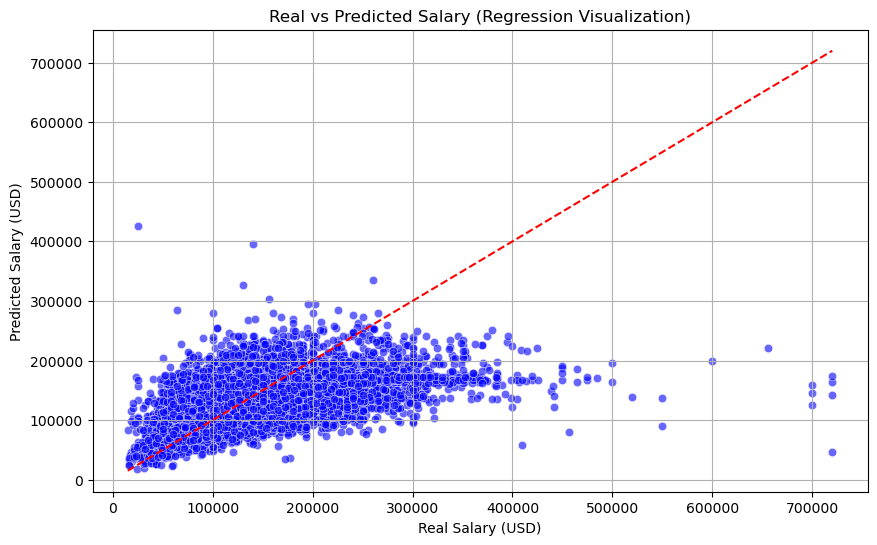


Final Model Evaluation (Without Data Leakage):
{'MAE': 42885.62484549916, 'RMSE': 57992.84477100965, 'R2': 0.214218884218644}


0.9928864478219731

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Esegui di nuovo la pipeline senza data leakage per ottenere predizioni finali
kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_true_all = []
y_pred_all = []

for train_index, test_index in kf.split(df):
    df_copy = df.copy()
    X = df_copy.drop('salary_in_usd', axis=1)
    y = np.log1p(df_copy['salary_in_usd'])  # Log transformation sul target
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline_no_leakage = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ])
    
    pipeline_no_leakage.fit(X_train, y_train)
    y_pred = pipeline_no_leakage.predict(X_test)
    
    # Trasformiamo indietro usando expm1 per tornare alla scala originale
    y_pred = np.expm1(y_pred)
    y_test = np.expm1(y_test)
    
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

# 2. Creazione dello scatter plot per visualizzare la regressione
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_true_all, y=y_pred_all, alpha=0.6, color='blue')
plt.plot([min(y_true_all), max(y_true_all)], [min(y_true_all), max(y_true_all)], color='red', linestyle='--')

plt.title("Real vs Predicted Salary (Regression Visualization)")
plt.xlabel("Real Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.grid(True)
plt.show()

# 3. Calcolo dell'errore e visualizzazione delle metriche finali
final_results = evaluate_model(np.array(y_true_all), np.array(y_pred_all))
print("\nFinal Model Evaluation (Without Data Leakage):")
print(final_results)